In [2]:
from matplotlib import pyplot

In [1]:
inp = []
def read_solution(filename, input):
    out, mcount = [], [] 
    T = len(input)
    with open(filename, "r") as f:
        for t in range(T):
            m = int(f.readline().strip())
            k = int(f.readline().strip())    
            n, y, x = input[t]["n"], input[t]["y"], input[t]["x"]        
            intervals = input[t]["intervals"]
            
            data = []
            for i in range(k):
                line = f.readline().strip().split()
                while len(line) == 0:
                    line = f.readline().strip().split()

                type, machine, p = map(int, line)
                if type == 1:
                    data.append(intervals[p - 1])
                else:
                    data.append((p, p + x - 1))
                    
            out.append(data)
            mcount.append(m)
    return out, mcount

with open("input.in", "r") as f:
    t = int(f.readline().strip())
    for _ in range(t):
        line = f.readline().strip().split()
        while len(line) == 0:
            line = f.readline().strip().split()
        n, y, x = map(int, line)
        intervals = []
        for i in range(n):
            line = f.readline().strip().split()
            while len(line) == 0:
                line = f.readline().strip().split()
            
            l, r = map(int, line)
            intervals.append((l, r))
        inp.append({
            "n" : n,
            "y" : y,
            "x" : x,
            "intervals" : intervals
        })
        
solutionA, mcountA = read_solution("a_output.out", inp)
solutionB, mcountB = read_solution("b_output.out", inp)
solutionC, mcountC = read_solution("c_output.out", inp)
solutionD, mcountD = read_solution("d_output.out", inp)

In [3]:
def add_line_to_plot(ax, x_data, y_data, label=None, color='r', linestyle='--', marker='o'):
    ax.plot(x_data, y_data, label=label, color=color, linestyle=linestyle, marker=marker)
    if label:
        ax.legend()

In [4]:
def computeDensity(intervals):
    n = len(intervals)
    points = []
    for interval in intervals:
        points.append((interval[0], 1))
        points.append((interval[1] + 1, -1))
        points.append((interval[1], 0))
        
    points.sort(key = lambda x: x[0])
    density = 0
    xmap = {}
    for point in points:
        x, delta = point
        density += delta
        xmap[x] = density
        
    xmap = sorted(xmap.items(), key=lambda x: x[0])
    x, y = [], []
    for el in xmap:
        x.append(el[0])
        y.append(el[1])
    return x, y

In [10]:
def plotForTC(tc = 0, a = True, b = True, c = True, d = True):
    fig = pyplot.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1)

    ax.set_title("Density Graph")
    ax.set_xlabel("Time")
    ax.set_ylabel("Density")

    x, y = computeDensity(inp[tc]["intervals"])
    add_line_to_plot(ax, x, y, label="Input density", color='blue', linestyle='-', marker=None)

    if a : 
        x, y = computeDensity(solutionA[tc])
        add_line_to_plot(ax, x, y, label=f"Solution A density, mcount = {mcountA[tc]}", color='red', linestyle='--', marker=None)

    if b:
        x, y = computeDensity(solutionB[tc])
        add_line_to_plot(ax, x, y, label=f"Solution B density, mcount = {mcountB[tc]}", color='green', linestyle=':', marker=None)
    
    if c : 
        x, y = computeDensity(solutionC[tc])
        add_line_to_plot(ax, x, y, label=f"Solution C density, mcount = {mcountC[tc]}", color='black', linestyle=':', marker=None)
    
    if d : 
        x, y = computeDensity(solutionD[tc])
        add_line_to_plot(ax, x, y, label=f"Solution D density, mcount = {mcountD[tc]}", color='pink', linestyle=':', marker=None)
    
    pyplot.show()

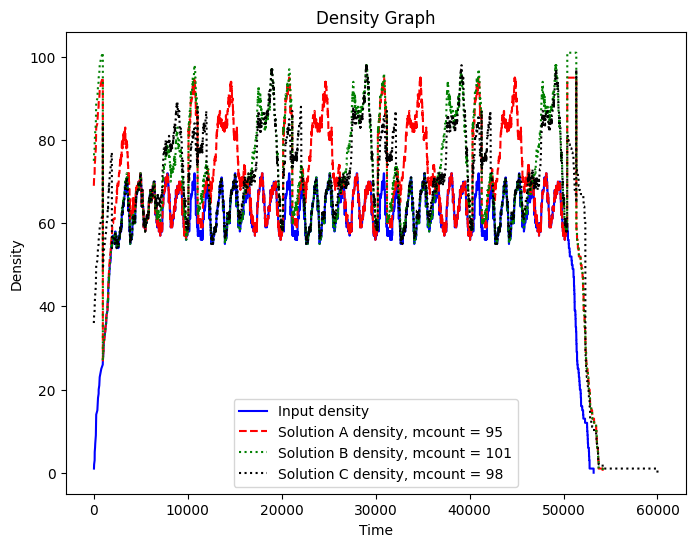

In [11]:
plotForTC(0, True, True, True, False)

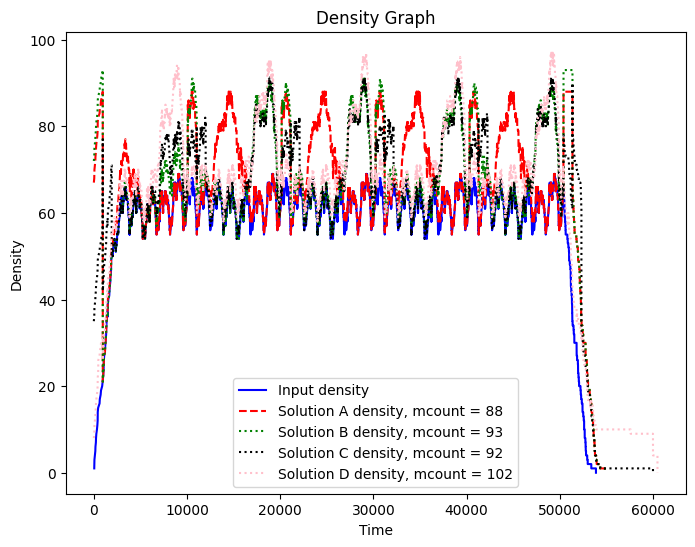

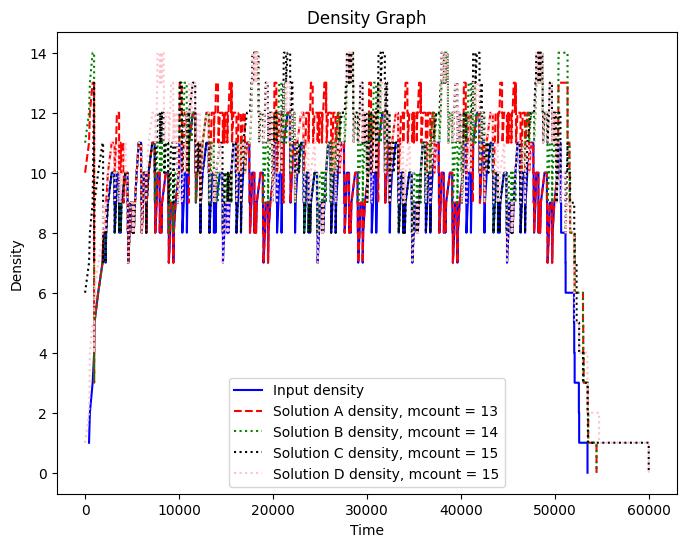

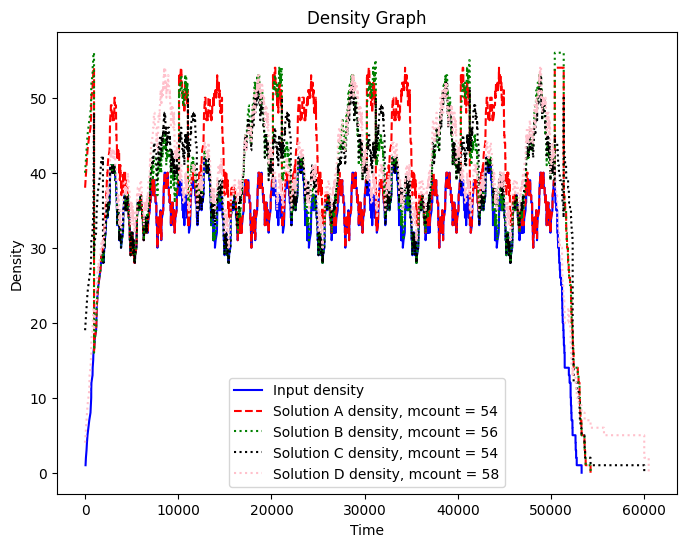

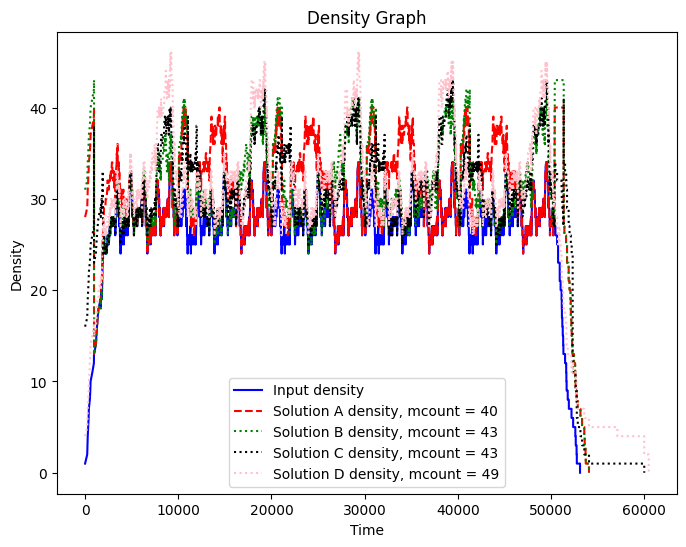

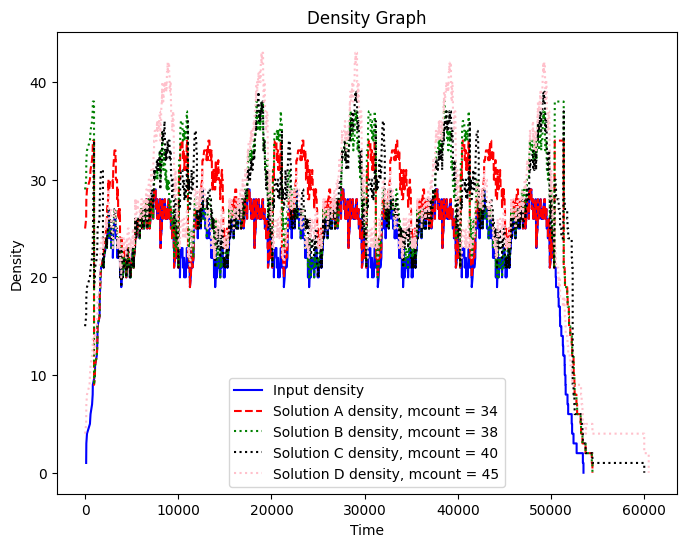

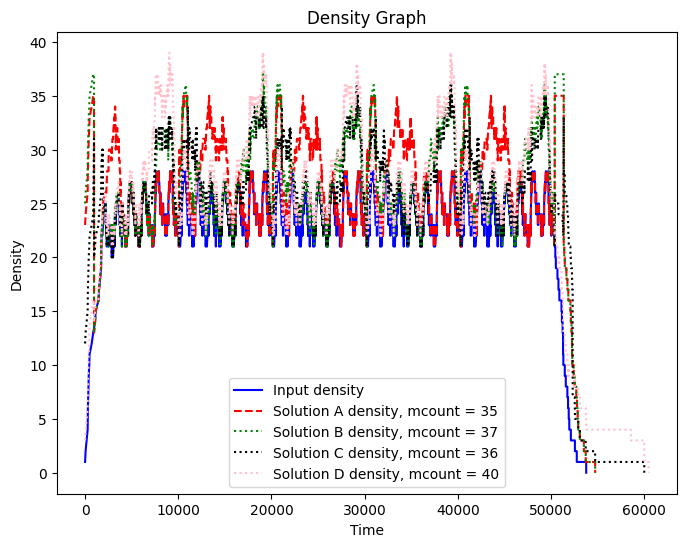

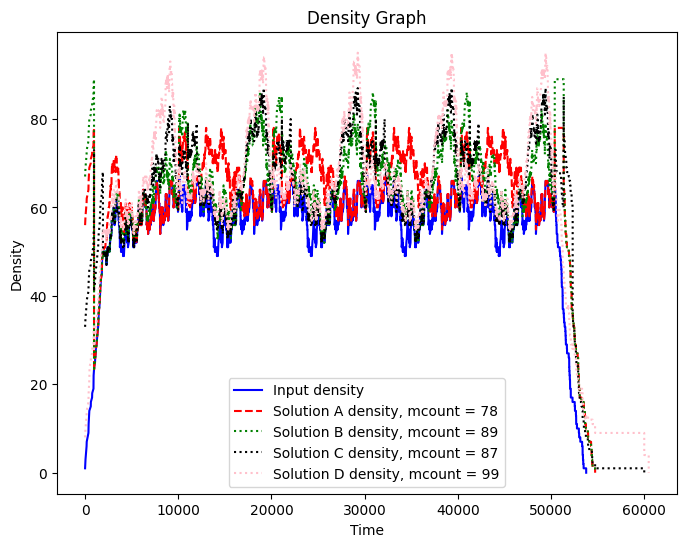

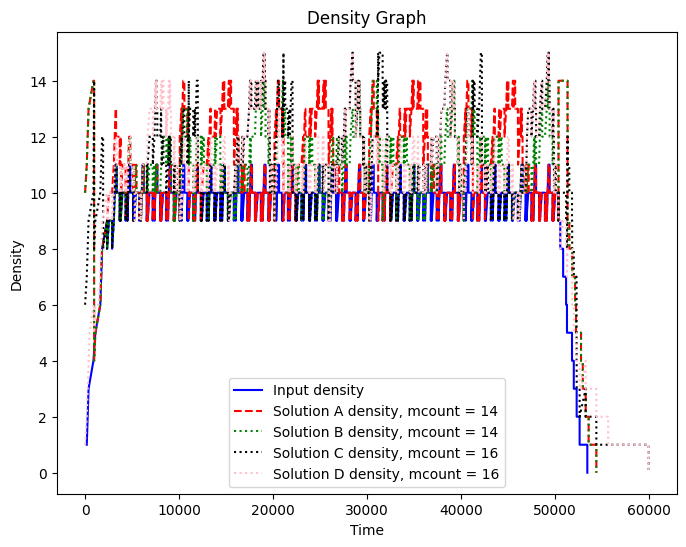

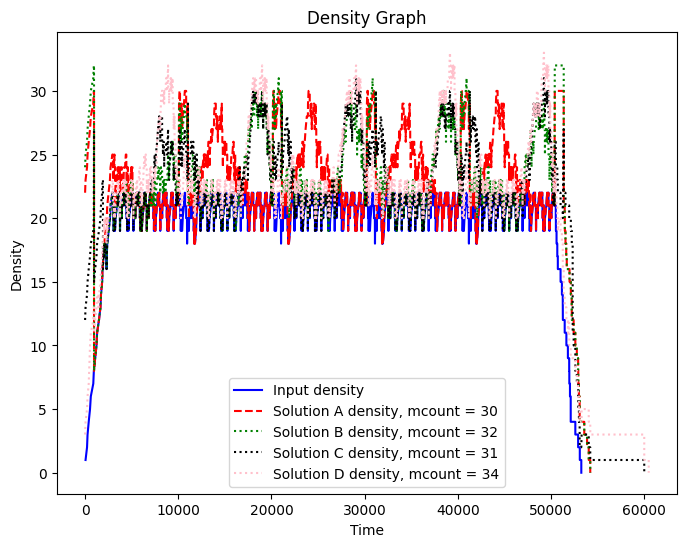

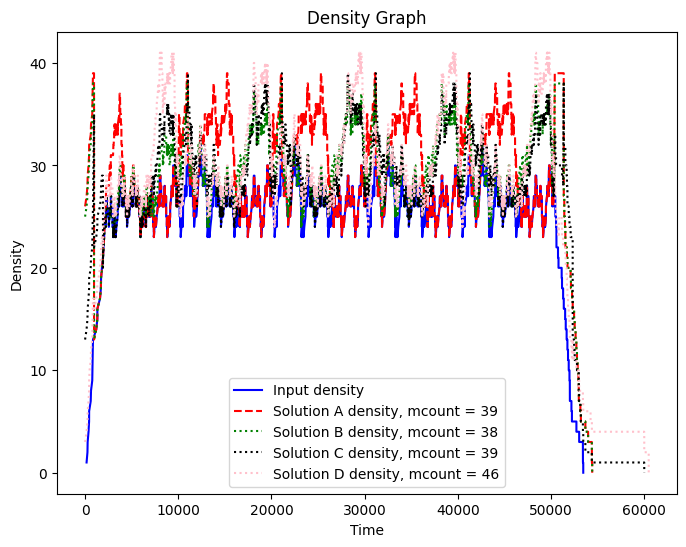

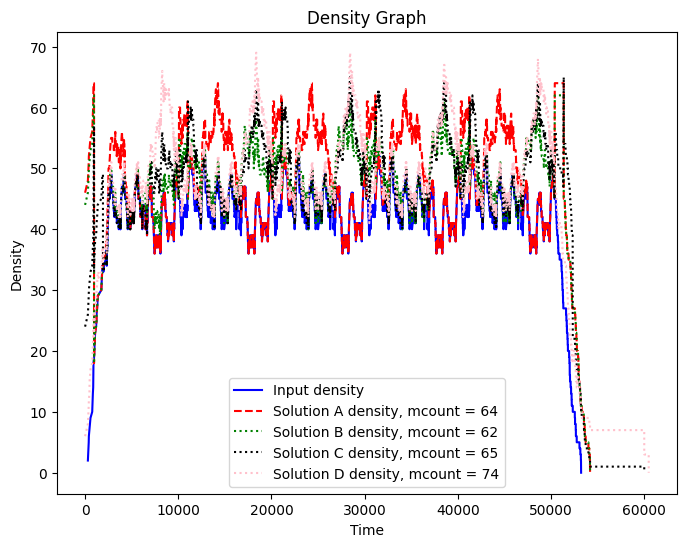

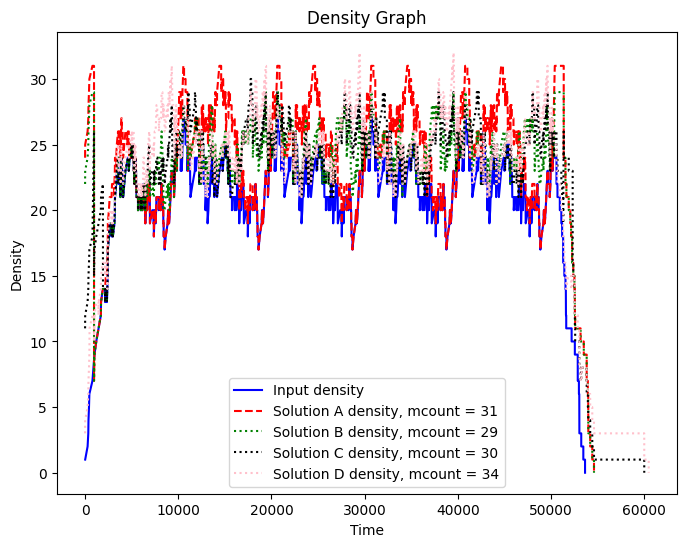

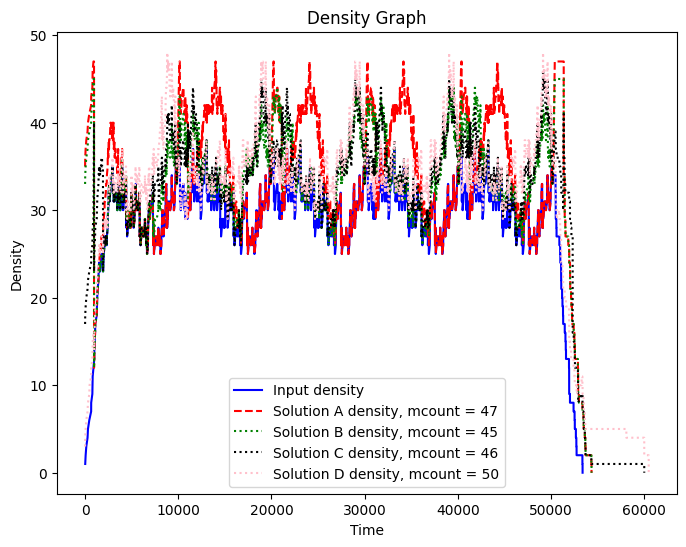

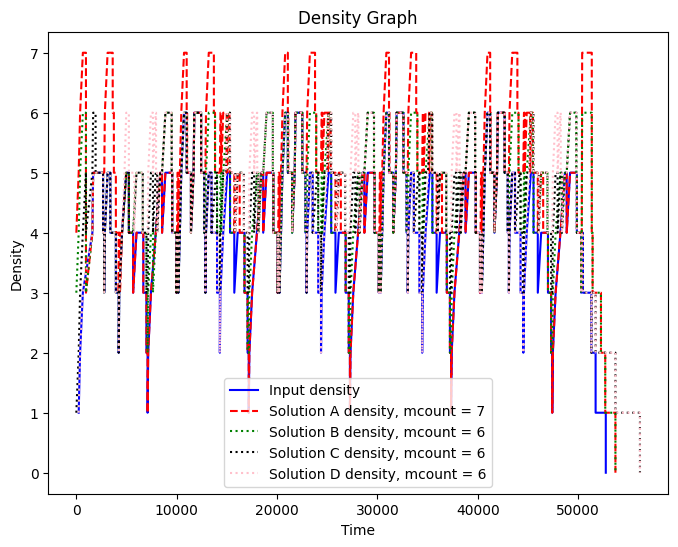

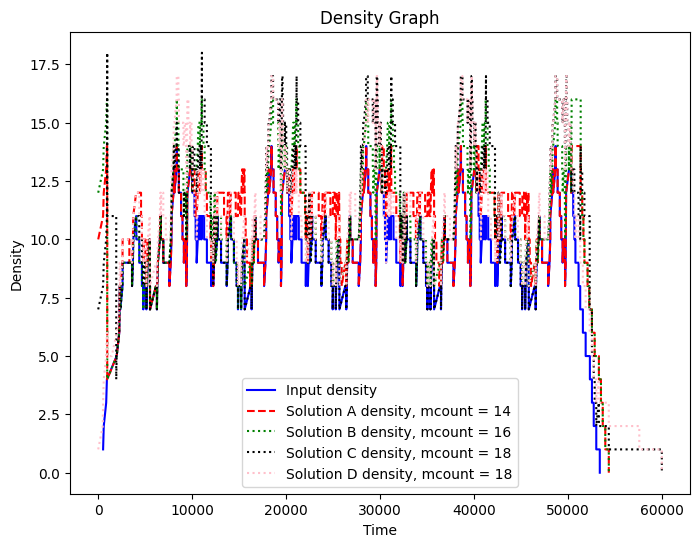

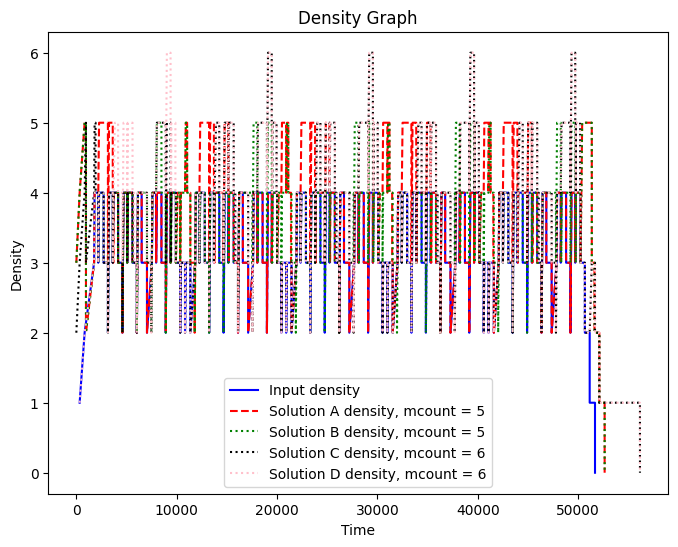

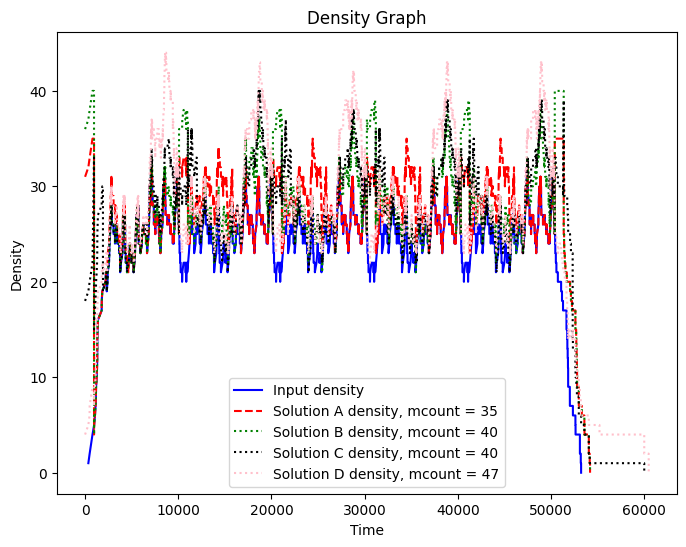

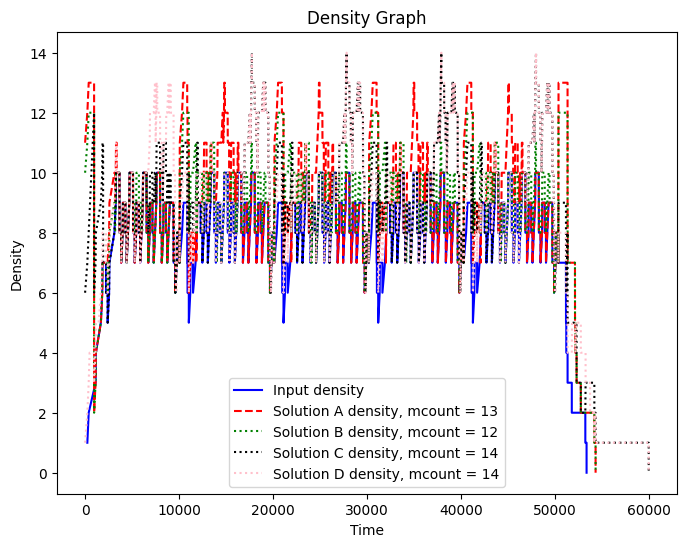

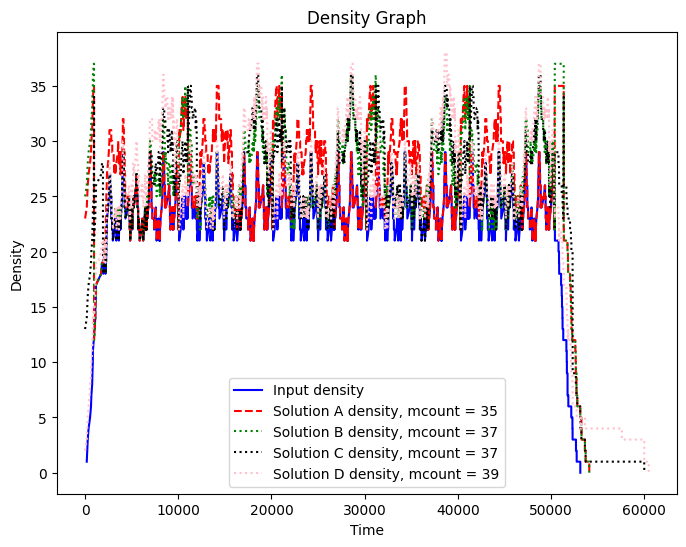

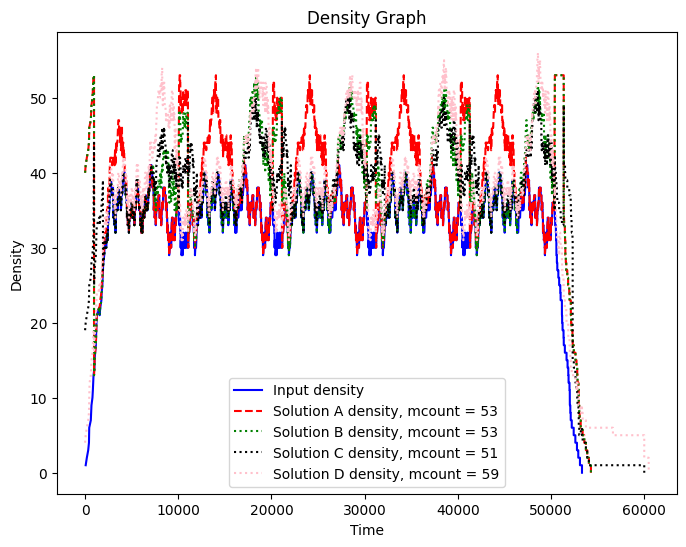

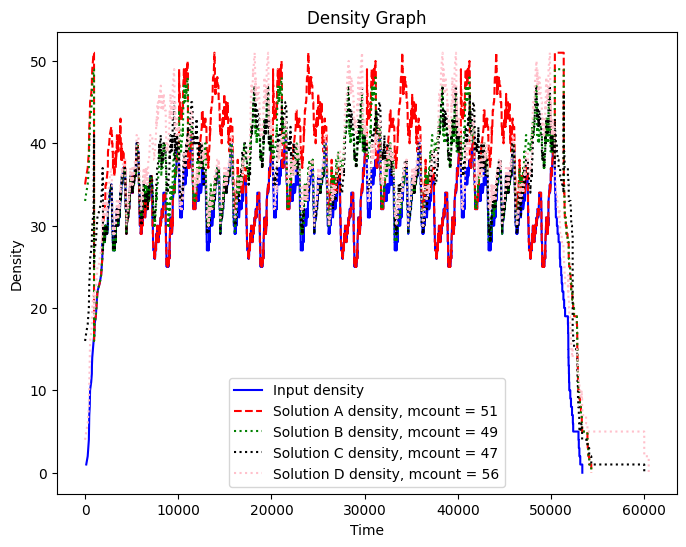

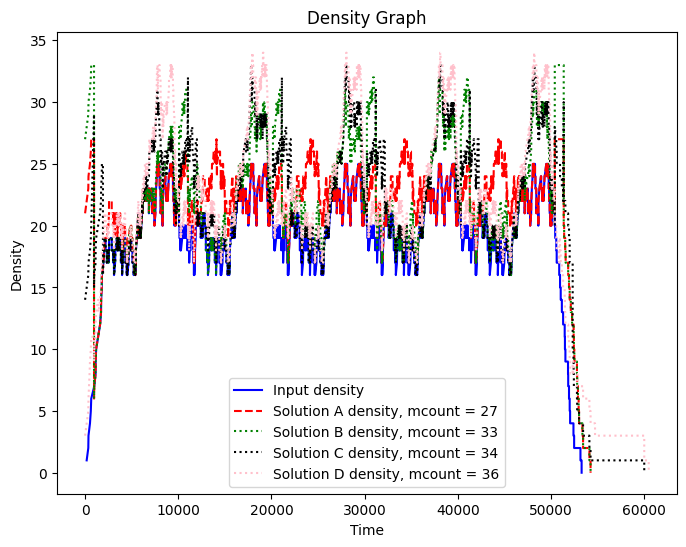

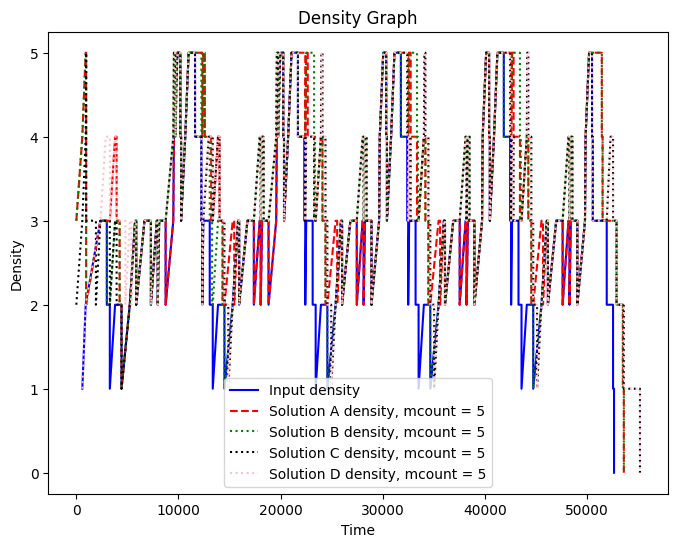

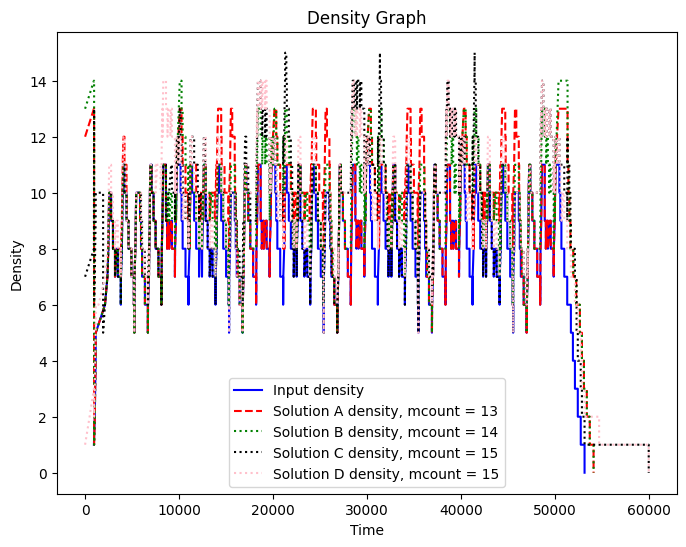

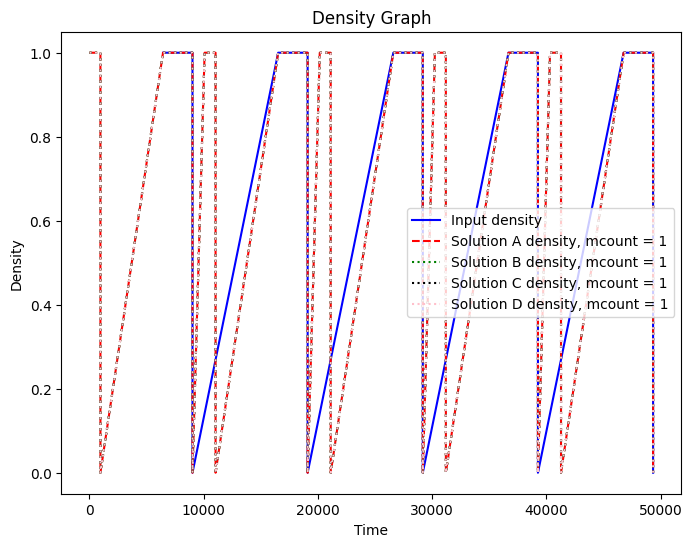

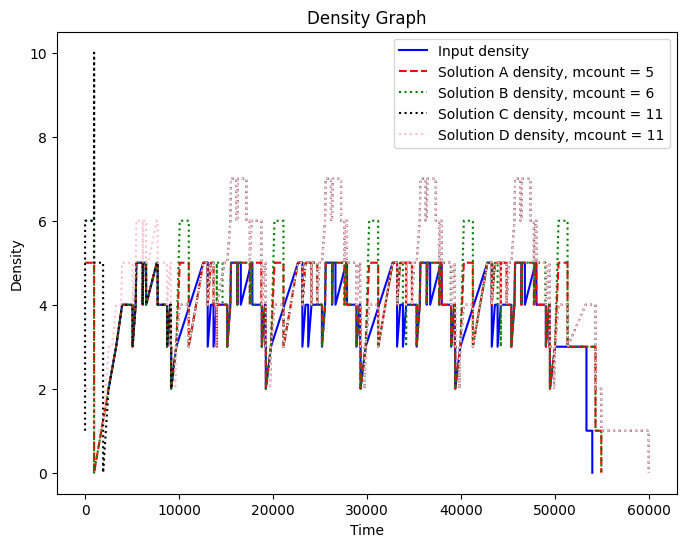

In [12]:
for i in range(1, len(inp)):
    plotForTC(i)